# 1 x 1 卷积的作用


一直搞不明白卷积神经网络中 1 x 1 kernel的作用，本文试图将整个思考过程记录下来

首先我们要知道 1 x 1 卷积是 ‘feature pooling’（特征汇聚） 技术

先演示下3x3x3矩阵

In [1]:
import numpy as np

In [5]:
a3x3x3 = np.array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],
       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],
       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [7]:
a3x3x3

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [32]:
a3x3x3[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [34]:
a3x3x3[0][1]

array([3, 4, 5])

上面我们去掉了a3x3x3的前两维度，剩下就是3了，来看下shape

In [35]:
a3x3x3[0][1].shape

(3,)

下面再看下另一个例子，是矩阵乘法

A x B x C,A是一个1 x 3的矩阵，B是一个3 x 3 x 3矩阵，C是一个3 x 1的矩阵

In [22]:
a = np.ones(shape=(1,3),dtype=np.int)
print(a)

[[1 1 1]]


In [15]:
b = np.random.randint(5,size=(3,3,3))
print(b)

[[[3 0 2]
  [0 2 1]
  [1 4 1]]

 [[1 3 3]
  [1 4 1]
  [2 1 3]]

 [[0 0 3]
  [0 3 1]
  [3 2 4]]]


In [16]:
c = np.random.randint(5,size=(3,1))
print(c)

[[1]
 [2]
 [3]]


In [27]:
ab = np.dot(a,b) # 其做法就是  a.dot(b[0]), a.dot(b[1]), a.dot(b[2])
print(ab)

[[[4 6 4]
  [4 8 7]
  [3 5 8]]]


In [24]:
a.dot(b[0]) # (1x3).dot(3,3) 产生一个 (1x3)的行

array([[4, 6, 4]])

In [25]:
np.array([a.dot(b[0]), a.dot(b[1]), a.dot(b[2])])

array([[[4, 6, 4]],

       [[4, 8, 7]],

       [[3, 5, 8]]])

In [28]:
ab.shape

(1, 3, 3)

In [29]:
abc = ab.dot(c)
print(abc)

[[[28]
  [41]
  [37]]]


In [30]:
abc.shape

(1, 3, 1)

In [38]:
abc[0][0]

array([28])

我们看下怎么计算出abc的 ab.shape=(1, 3, 3), c.shape=(3,1)

In [44]:
print(ab[0][0].shape)
print(c.shape)

(3,)
(3, 1)


In [47]:
np.array([ab[0][0].dot(c),ab[0][1].dot(c),ab[0][2].dot(c)])

array([[28],
       [41],
       [37]])

In [49]:
np.array([ab[0].dot(c)])

array([[[28],
        [41],
        [37]]])

下面我们就可以来看下卷积神经网络了

假设我们的输入是 (3,3,3) 我们现在要乘以一个 (1,1)卷积怎么做?

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [50]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [62]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

In [63]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [64]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
#https://en.wikipedia.org/wiki/Channel_(digital_image)
#channels mean number of primary colors
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

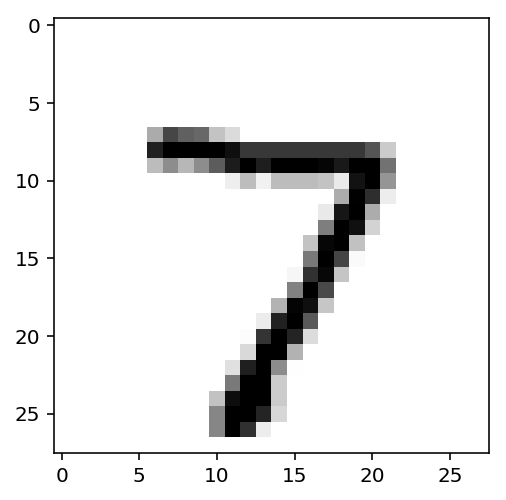

In [109]:
image1 = data.test.images[0]
plot_image(image1)

In [110]:
x_image1 = image1.reshape((28,28,1))

In [111]:
x_image1.shape

(28, 28, 1)

假设我们有一个（1，1）的卷积，其shape是(1,1,1,4)，即会输出为4层

In [129]:
filter1 = np.ones(shape=(1,1,1,4))

In [130]:
filter1[0][0][0] = [0.25,0.5,0.75,1.0]

In [131]:
filter_value = filter1[0][0][0]

In [132]:
filter_value 

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [133]:
layer_conv1 = np.zeros(shape=(28,28,4))

In [134]:
layer_conv1[:,:,0] = x_image1[:,:,0] * filter_value[0]
layer_conv1[:,:,1] = x_image1[:,:,0] * filter_value[1]
layer_conv1[:,:,2] = x_image1[:,:,0] * filter_value[2]
layer_conv1[:,:,3] = x_image1[:,:,0] * filter_value[3]

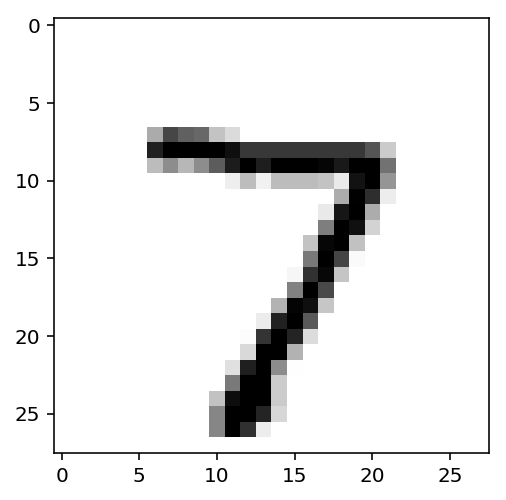

In [120]:
plot_image(layer_conv1[:,:,0])

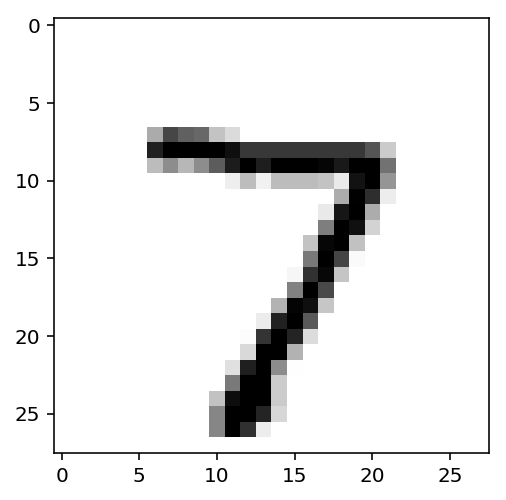

In [123]:
plot_image(layer_conv1[:,:,1])

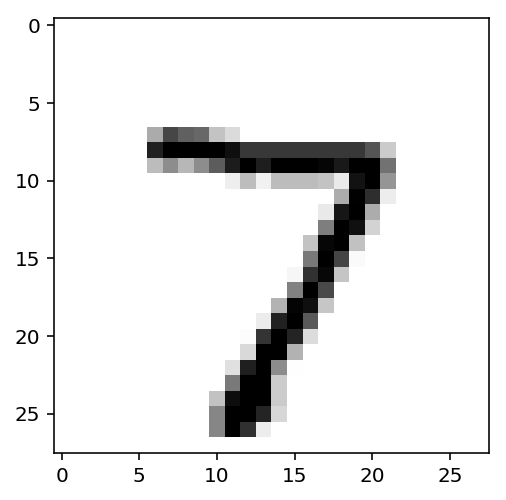

In [124]:
plot_image(layer_conv1[:,:,2])

In [138]:
np.isclose(layer_conv1[:,:,3]-layer_conv1[:,:,0],layer_conv1[:,:,2]).all()

True

分析了上面这么久，我们就想说 1 x 1 的卷积作用是可以减少数据层数（虽然上面我们是增加了，但是假设我们有一个200 x 200 x 50的数据，我们用 1 x 1 x 20的filters，出来的就是一个 200 x 200 x 20的数据）

还有一篇解释的较好的文章是：http://iamaaditya.github.io/2016/03/one-by-one-convolution/